In [3]:
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = "/content/drive/MyDrive/JJIM/annotations1.csv"
df = pd.read_csv(csv_file)


image_folder = "/content/drive/MyDrive/JJIM/images"

for index, row in df.iterrows():
    image_name = row['Image Name']
    label = row['Image Name']

    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):

        image = Image.open(image_path)

print(df)

         Image Name Majority Vote Label  \
0     MHIST_aaa.png                 SSA   
1     MHIST_aab.png                  HP   
2     MHIST_aac.png                 SSA   
3     MHIST_aae.png                  HP   
4     MHIST_aaf.png                 SSA   
...             ...                 ...   
3147  MHIST_cpn.png                 SSA   
3148  MHIST_cfc.png                 SSA   
3149  MHIST_cgp.png                 SSA   
3150  MHIST_dlf.png                 SSA   
3151  MHIST_cks.png                 SSA   

      Number of Annotators who Selected SSA Out of 7 Partition  
0                                                  6     train  
1                                                  0     train  
2                                                  5     train  
3                                                  1     train  
4                                                  5     train  
...                                              ...       ...  
3147                        

In [4]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-zdh5804w
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-zdh5804w
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 51ae19245f655cf0ee334db2a945ceb1a4d6df59
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.0-py3-none-any.whl size=37432 sha256=f15b894ef22f1689d04723c365c4968db29582f649449719f6ce0a353a7d72a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-afll85g6/wheels/23/11/66/71a38b0c29ba4ec5f62105a2145278613855bc9c94eecf630d
Successfully built grad-cam


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.dropna(inplace=True)

In [7]:
import random

image_files = os.listdir(image_folder)

random_image_files = random.sample(image_files, 5)

for image_file in random_image_files:
    image_path = os.path.join(image_folder, image_file)

    image = Image.open(image_path)

    width, height = image.size

    print(f"Image: {image_file}, Width: {width}, Height: {height}")

Image: MHIST_epu.png, Width: 224, Height: 224
Image: MHIST_cio.png, Width: 224, Height: 224
Image: MHIST_cxh.png, Width: 224, Height: 224
Image: MHIST_bcl.png, Width: 224, Height: 224
Image: MHIST_crg.png, Width: 224, Height: 224


<ipython-input-8-de122e7d67c3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


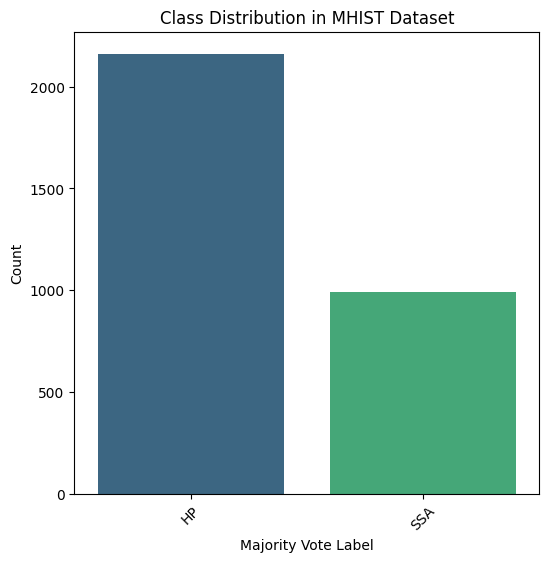

<ipython-input-8-de122e7d67c3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Majority Vote Label', palette='viridis')


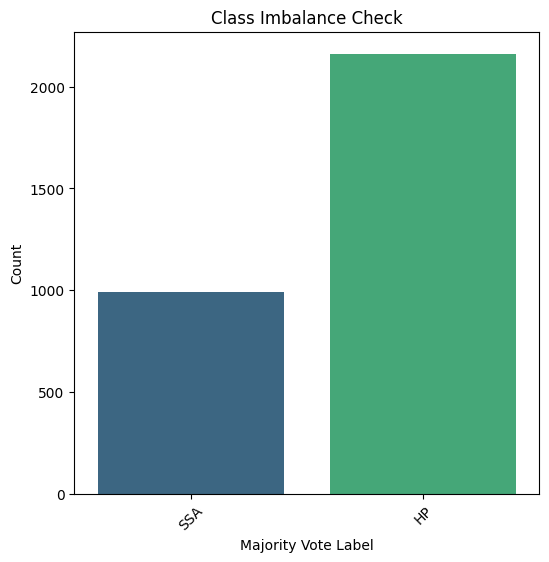

In [8]:
class_counts = df['Majority Vote Label'].value_counts()

# class distribution
plt.figure(figsize=(6, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in MHIST Dataset')
plt.xlabel('Majority Vote Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# class imbalance
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Majority Vote Label', palette='viridis')
plt.title('Class Imbalance Check')
plt.xlabel('Majority Vote Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
df.head()

,Image Name,Majority Vote Label,Number of Annotators who Selected SSA Out of 7,Partition
0,MHIST_aaa.png,SSA,6,train
1,MHIST_aab.png,HP,0,train
2,MHIST_aac.png,SSA,5,train
3,MHIST_aae.png,HP,1,train
4,MHIST_aaf.png,SSA,5,train


In [10]:
df.tail()

,Image Name,Majority Vote Label,Number of Annotators who Selected SSA Out of 7,Partition
3147,MHIST_cpn.png,SSA,7,train
3148,MHIST_cfc.png,SSA,7,test
3149,MHIST_cgp.png,SSA,7,test
3150,MHIST_dlf.png,SSA,7,train
3151,MHIST_cks.png,SSA,7,train


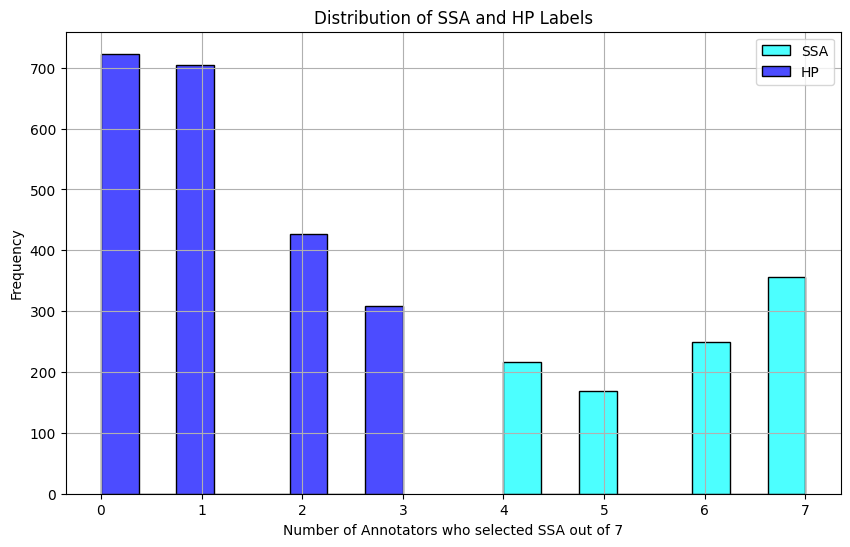

In [11]:
ssa_counts = df.loc[df['Majority Vote Label'] == 'SSA', 'Number of Annotators who Selected SSA Out of 7']
hp_counts = df.loc[df['Majority Vote Label'] == 'HP', 'Number of Annotators who Selected SSA Out of 7']

# histogram for distribution of Labels
plt.figure(figsize=(10, 6))
sns.histplot(ssa_counts, color='cyan', label='SSA', bins=8, alpha=0.7)
sns.histplot(hp_counts, color='blue', label='HP', bins=8, alpha=0.7)
plt.title('Distribution of SSA and HP Labels')
plt.xlabel('Number of Annotators who selected SSA out of 7')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


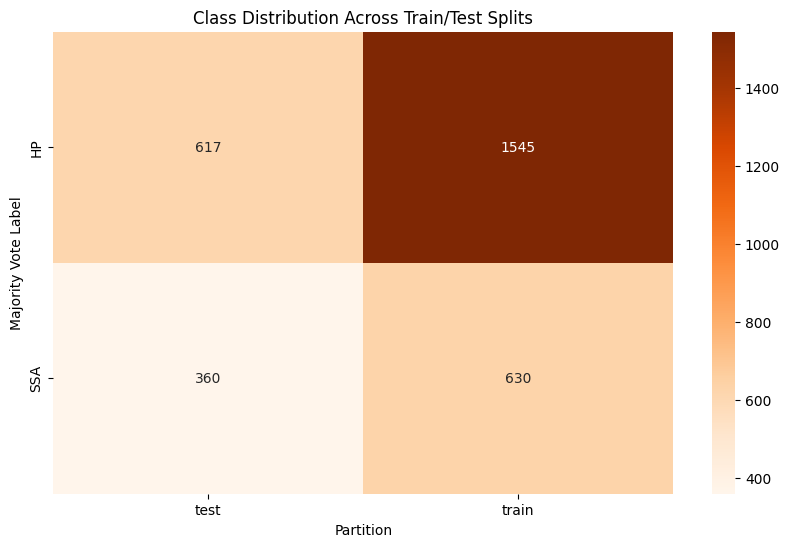

In [12]:
metadata_cols = ['Partition']

# cross-tabulation Labels
heatmap_data = pd.crosstab(df['Majority Vote Label'], df['Partition'])

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Oranges")
plt.title('Class Distribution Across Train/Test Splits')
plt.xlabel('Partition')
plt.ylabel('Majority Vote Label')
plt.show()

In [13]:
# model 1
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, roc_auc_score
from PIL import Image

# VisionTransformer model
class VisionTransformer(nn.Module):
    def __init__(self, num_classes):
        super(VisionTransformer, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(512 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 512 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class CustomDataset(Dataset):
    def __init__(self, df, image_folder, transform=None, partition='train'):
        self.df = df[df['Partition'] == partition]
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.df.iloc[idx, 0]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = 1 if self.df.iloc[idx, 1] == 'SSA' else 0
        return image, label

# datasets and data loaders
train_dataset = CustomDataset(df, image_folder, transform, partition='train')
test_dataset = CustomDataset(df, image_folder, transform, partition='test')
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model1 = VisionTransformer(num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)  # Experiment with different learning rates

# moved model to GPU as my CPU was not being compatible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = model1.to(device)

num_epochs = 50 #kept epochs as 50, can be increased to get higher accuracy as the model will get robust
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    true_labels = []
    total_predictions = []

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model1(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        total_predictions.extend(predicted.cpu().numpy())

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy1 = accuracy_score(true_labels, total_predictions)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy1}")

# evaluating
model1.eval()
correct_predictions = 0
total_predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model1(images)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy1 = correct_predictions / len(test_dataset)
print('\nTest accuracy:', accuracy1)

auc1 = roc_auc_score(true_labels, total_predictions)
print("AUC:", auc1)



Epoch 1/50, Loss: 0.7141006588661808, Accuracy: 0.7016091954022988
Epoch 2/50, Loss: 0.5988107507256256, Accuracy: 0.7103448275862069
Epoch 3/50, Loss: 0.5918167101103684, Accuracy: 0.7103448275862069
Epoch 4/50, Loss: 0.5890500623878391, Accuracy: 0.7089655172413794
Epoch 5/50, Loss: 0.5872538693197842, Accuracy: 0.7112643678160919
Epoch 6/50, Loss: 0.5469732059829536, Accuracy: 0.7213793103448276
Epoch 7/50, Loss: 0.5259941556261873, Accuracy: 0.7448275862068966
Epoch 8/50, Loss: 0.5044387533746917, Accuracy: 0.7622988505747127
Epoch 9/50, Loss: 0.4799130487716061, Accuracy: 0.7751724137931034
Epoch 10/50, Loss: 0.47303351702361274, Accuracy: 0.7691954022988505
Epoch 11/50, Loss: 0.45330359727486796, Accuracy: 0.7793103448275862
Epoch 12/50, Loss: 0.4291411045638994, Accuracy: 0.799080459770115
Epoch 13/50, Loss: 0.41958587772544775, Accuracy: 0.8045977011494253
Epoch 14/50, Loss: 0.4101078382031671, Accuracy: 0.8064367816091954
Epoch 15/50, Loss: 0.37652829701873075, Accuracy: 0.830

In [14]:
print(model1)

VisionTransformer(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


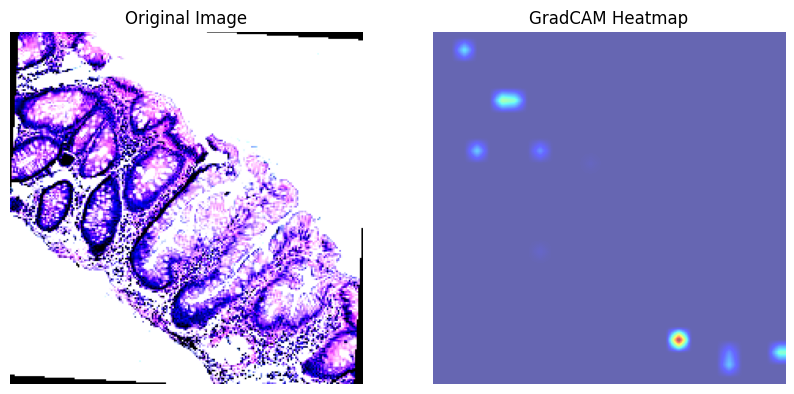

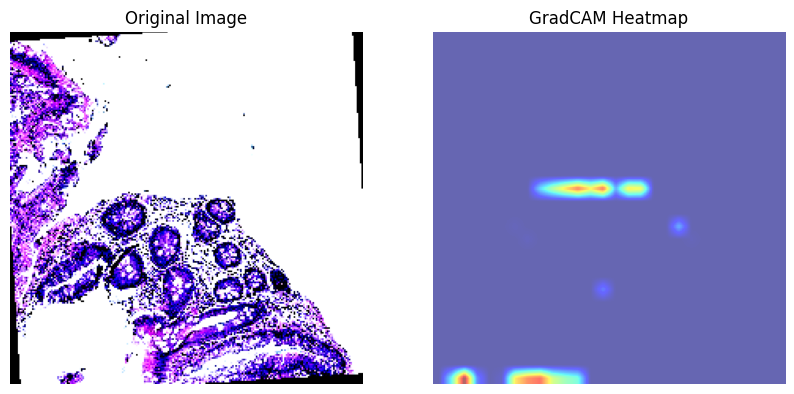

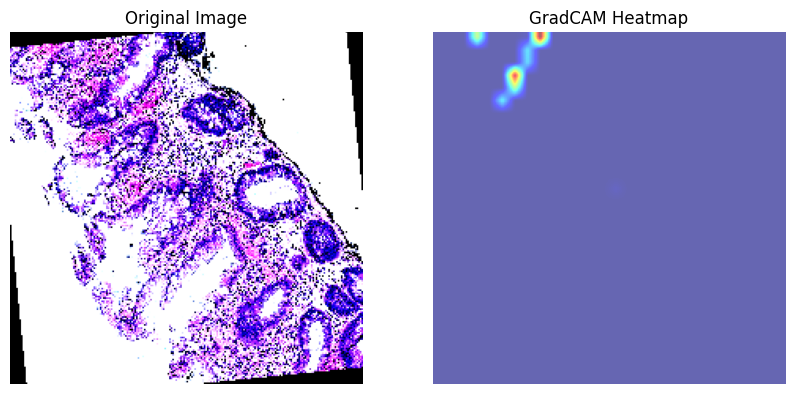

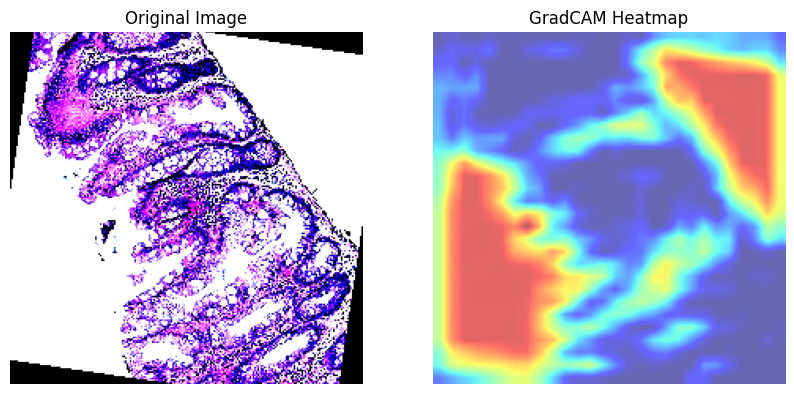

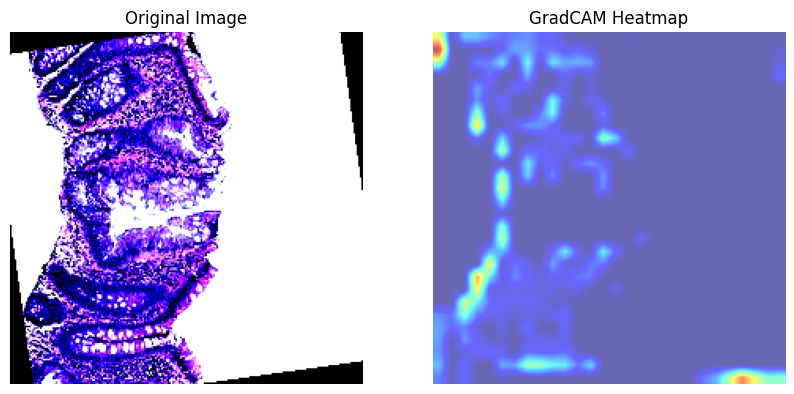

In [15]:
# heatmap for model1
import torch
import os
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from pytorch_grad_cam import GradCAM
from PIL import Image
import matplotlib.pyplot as plt

target_layer = model1.conv4

gradcam = GradCAM(model=model1, target_layers=[target_layer])

sample_indices = torch.randperm(len(test_dataset))[:5]

for idx in sample_indices:
    image, label = test_dataset[idx]
    image_tensor = image.unsqueeze(0)
    image_tensor = image_tensor.to(device)

    heatmap = gradcam(image_tensor)

    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(heatmap.squeeze(), cmap='jet', alpha=0.6)
    plt.title('GradCAM Heatmap')
    plt.axis('off')
    plt.show()



In [16]:
#model2 (ViT with pretrained ResnNet50)
import torchvision.models as models

class VisionTransformer(nn.Module):
    def __init__(self, num_classes):
        super(VisionTransformer, self).__init__()
        self.model = models.resnet50(pretrained=True)
        for param in self.model.parameters():
            param.requires_grad = False
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x

model2 = VisionTransformer(num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = model2.to(device)

num_epochs = 30
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    total_predictions = []
    true_labels = []

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        total_predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy2 = accuracy_score(true_labels, total_predictions)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy2}")

model2.eval()
correct_predictions = 0
total_predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model2(images)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions.extend(outputs.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


import numpy as np

true_labels = np.array(true_labels)

total_predictions = np.array(total_predictions)

print("true_labels shape:", true_labels.shape)
print("total_predictions shape:", total_predictions.shape)

threshold = 0.5
binary_predictions = np.where(total_predictions[:, 1] >= threshold, 1, 0)

binary_predictions = binary_predictions.ravel()

print("true_labels shape after manipulation:", true_labels.shape)
print("binary_predictions shape after manipulation:", binary_predictions.shape)

accuracy2 = accuracy_score(true_labels, binary_predictions)
print('\nTest accuracy:', accuracy2)

auc2 = roc_auc_score(true_labels, total_predictions[:, 1])
print("AUC:", auc2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 193MB/s]


Epoch 1/30, Loss: 0.5779558263701954, Accuracy: 0.7094252873563218
Epoch 2/30, Loss: 0.5321232495088687, Accuracy: 0.7190804597701149
Epoch 3/30, Loss: 0.5040885153995163, Accuracy: 0.7342528735632184
Epoch 4/30, Loss: 0.48648149513650213, Accuracy: 0.7489655172413793
Epoch 5/30, Loss: 0.47728638457155775, Accuracy: 0.7627586206896552
Epoch 6/30, Loss: 0.4622963691853929, Accuracy: 0.7742528735632184
Epoch 7/30, Loss: 0.4472582885588723, Accuracy: 0.7857471264367816
Epoch 8/30, Loss: 0.4426756609171286, Accuracy: 0.7852873563218391
Epoch 9/30, Loss: 0.4411520699385939, Accuracy: 0.7903448275862069
Epoch 10/30, Loss: 0.4381816891144062, Accuracy: 0.7866666666666666
Epoch 11/30, Loss: 0.43779924624267663, Accuracy: 0.7852873563218391
Epoch 12/30, Loss: 0.426081794568862, Accuracy: 0.7944827586206896
Epoch 13/30, Loss: 0.41941723189134705, Accuracy: 0.8
Epoch 14/30, Loss: 0.42278752775027834, Accuracy: 0.7977011494252874
Epoch 15/30, Loss: 0.4187542722965109, Accuracy: 0.7958620689655173


In [17]:
print(model2)

VisionTransformer(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [18]:
# #heatmap for model 2
# import torch
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
# from pytorch_grad_cam import GradCAM
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np

# target_layer = model2.model.layer4[-1]

# gradcam = GradCAM(model=model2, target_layers=[target_layer])

# sample_indices = torch.randperm(len(test_dataset))[:5]

# for idx in sample_indices:
#     image, label = test_dataset[idx]

#     image_tensor = image.unsqueeze(0).to(device)

#     heatmap = gradcam(image_tensor)

#     heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(image.permute(1, 2, 0))
#     plt.title('Original Image')
#     plt.axis('off')
#     plt.subplot(1, 2, 2)
#     plt.imshow(heatmap.squeeze(), cmap='jet', alpha=0.6)
#     plt.title('GradCAM Heatmap')
#     plt.axis('off')
#     plt.show()


In [19]:
# #model3
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# from torchvision import models, transforms
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, roc_auc_score
# import pandas as pd
# from PIL import Image
# import os

# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, df, image_folder, transform=None):
#         self.df = df
#         self.image_folder = image_folder
#         self.transform = transform
#         self.label_encoder = LabelEncoder()

#         self.df['Encoded_Label'] = self.label_encoder.fit_transform(self.df['Majority Vote Label'])

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         img_name = os.path.join(self.image_folder, self.df.iloc[idx, 0])
#         image = Image.open(img_name).convert('RGB')
#         label = torch.tensor(self.df.iloc[idx, -1], dtype=torch.long)

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# train_transforms = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# test_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# train_dataset = CustomDataset(df, image_folder, transform, partition='train')
# test_dataset = CustomDataset(df, image_folder, transform, partition='test')
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # CNN model - ResNet50
# class CNNResNet50(nn.Module):
#     def __init__(self, num_classes):
#         super(CNNResNet50, self).__init__()
#         self.resnet50 = models.resnet50(pretrained=True)
#         for param in self.resnet50.parameters():
#             param.requires_grad = False
#         num_features = self.resnet50.fc.in_features
#         self.resnet50.fc = nn.Linear(num_features, num_classes)

#     def forward(self, x):
#         return self.resnet50(x)

# model3 = CNNResNet50(num_classes=2)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model3.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model3 = model3.to(device)

# num_epochs = 30
# for epoch in range(num_epochs):
#     model3.train()
#     running_loss = 0.0
#     true_labels = []
#     total_predictions = []

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model3(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#         _, predicted = torch.max(outputs, 1)
#         true_labels.extend(labels.cpu().numpy())
#         total_predictions.extend(predicted.cpu().numpy())

#     epoch_loss = running_loss / len(train_loader.dataset)
#     epoch_accuracy = accuracy_score(true_labels, total_predictions)
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}")

# model3.eval()
# correct_predictions = 0
# total_predictions = []
# true_labels = []

# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = model3(images)
#         _, predicted = torch.max(outputs, 1)
#         correct_predictions += (predicted == labels).sum().item()
#         total_predictions.extend(outputs.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())

# total_predictions = np.array(total_predictions)

# accuracy3 = accuracy_score(true_labels, total_predictions)
# print('\nTest accuracy:', accuracy3)

# auc_score = roc_auc_score(true_labels, total_predictions[:, 1])
# print("ROC AUC Score:", auc_score)


In [20]:
# #heatmap for model3
# import torch
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
# from pytorch_grad_cam import GradCAM
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np

# target_layer = model3.resnet50.layer4[-1]

# gradcam = GradCAM(model=model3, target_layer=target_layer)

# sample_indices = torch.randperm(len(test_dataset))[:5]

# for idx in sample_indices:
#     image, label = test_dataset[idx]
#     image_tensor = image.unsqueeze(0).to(device)

#     heatmap = gradcam(image_tensor)

#     heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))

#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(image.permute(1, 2, 0))
#     plt.title('Original Image')
#     plt.axis('off')
#     plt.subplot(1, 2, 2)
#     plt.imshow(heatmap.squeeze(), cmap='jet', alpha=0.6)
#     plt.title('GradCAM Heatmap')
#     plt.axis('off')
#     plt.show()


In [21]:
#I tried to experiment with 3 models: ViT, ViT (with pretrained CNN), and a CNN
#I noticed that involving a CNN results in better performance on small datasets. However, ViT will perform better as the dataset increases with increase in epochs as the model is trained well.
#Plotting the heatmaps using GradCAM was interesting as the library was not open-sourced on colab or kaggle. Implementing it was tedious and threw many errors, but eventually I found a solution for model1. Model2 had spatial dimensionality errors which took a lot of my time and I had to drop the idea.
#The model2 and model3 are for experimental purposes only. If given more time, I could experiment more to provide the best model.
#I researched and found out that there is a model implemented usinf fast.ai which provides higher accuracy for 100 epochs. If reverse engineered, I could implement the same using Torch.
#Overall I personally think that TensorFlow is a better option than Torch.
#In case of choosing between CNN or ViT, I believe ViT will perform better on huge datasets. My device does not support high computational levels so i had to use colab pro to get a better GPU. If a high computing device is available, I can train a better model.
#I request you to consider only the model1 as my submission as the other models were just for my experimental purposes.
#I wished to experiment more with different e=seeting to increase the robustness and accuracy for the model. However the time span and my device compatibility were a barrier.